In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv(r"C:\Users\Sakshi\Downloads\1_Store_Dataset.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,MonthName,Payment,Rating,Unit price,Quantity,Total Sales
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,05-01-2019,January,Ewallet,9.1,74.69,7,548.9715
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,08-03-2019,March,Cash,9.6,15.28,5,80.2200
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,03-03-2019,March,Credit card,7.4,46.33,7,340.5255
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,27-01-2019,January,Ewallet,8.4,58.22,8,489.0480
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,08-02-2019,February,Ewallet,5.3,86.31,7,634.3785


In [8]:
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")


Number of rows: 1000
Number of columns: 13


In [10]:
#Shape
df.shape

(1000, 13)

In [11]:
#info
df.info

<bound method DataFrame.info of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line        Date MonthName      Payment  Rating  \
0         Health and beauty  05-01-2019   January      Ewallet     9.1   
1    Electronic accessories  08-03-2019     March         Cash     9.6   
2        Home and lifesty

In [12]:
#Finding missing value
df.isnull().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Date             0
MonthName        0
Payment          0
Rating           0
Unit price       0
Quantity         0
Total Sales      0
dtype: int64

In [13]:
#Finding duplicates
df.duplicated().sum()

0

In [14]:
#EDA


In [17]:
#descriptive statistics
df.describe()

,Rating,Unit price,Quantity,Total Sales
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,6.97270,55.672130,5.510000,322.966749
std,1.71858,26.494628,2.923431,245.885335
min,4.00000,10.080000,1.000000,10.678500
25%,5.50000,32.875000,3.000000,124.422375
50%,7.00000,55.230000,5.000000,253.848000
75%,8.50000,77.935000,8.000000,471.350250
max,10.00000,99.960000,10.000000,1042.650000


Text(0.5, 1.0, 'Distribution of Ratings')

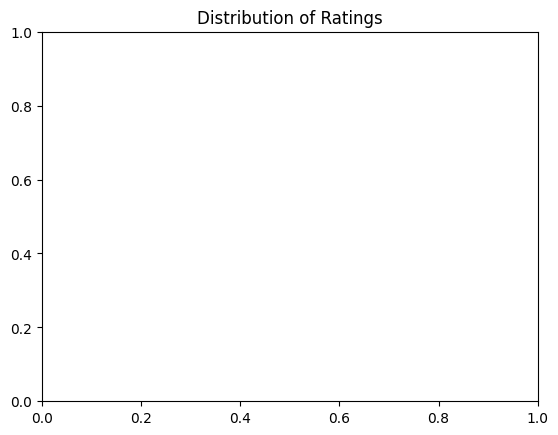

In [42]:
plt.title("Distribution of Ratings")


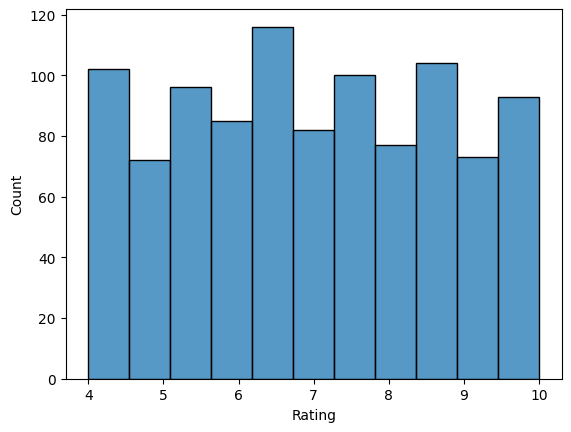

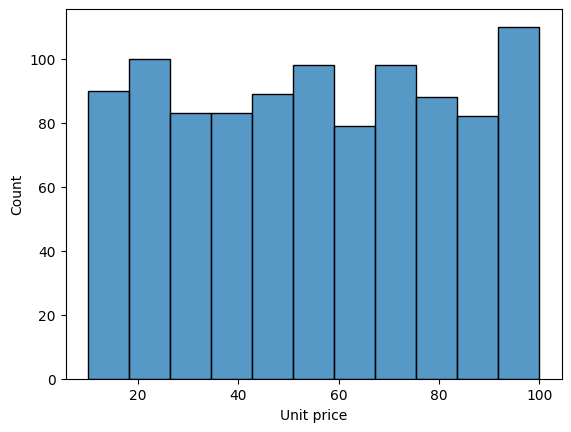

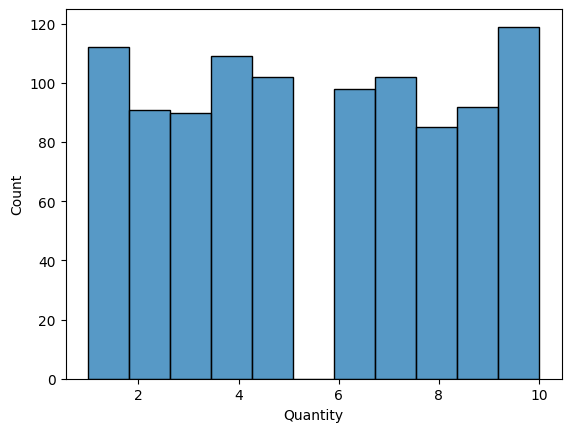

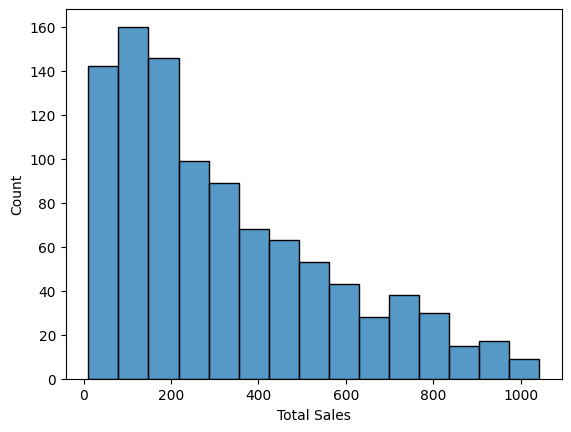

In [18]:
# Histogram to understand the distribution
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df, x=i)
    plt.show()

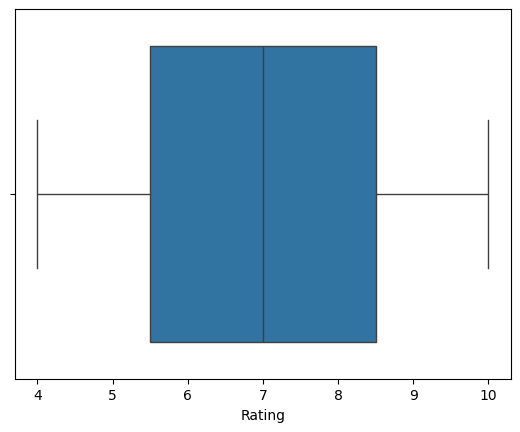

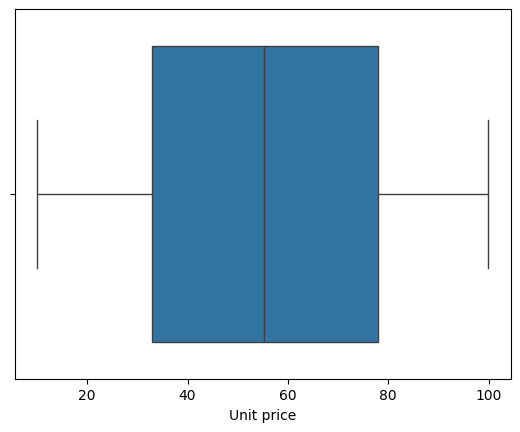

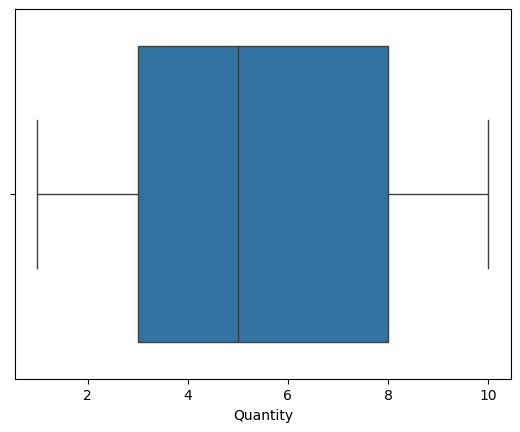

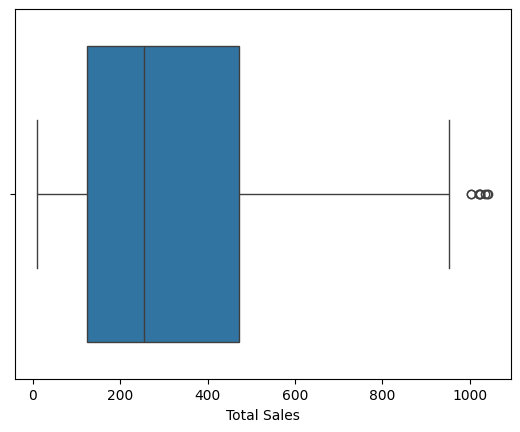

In [19]:
#Boxplot-to-identify outliers
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [23]:
# Scatter plot to understand the relationship
df.select_dtypes(include="number").columns


Index(['Rating', 'Unit price', 'Quantity', 'Total Sales'], dtype='object')

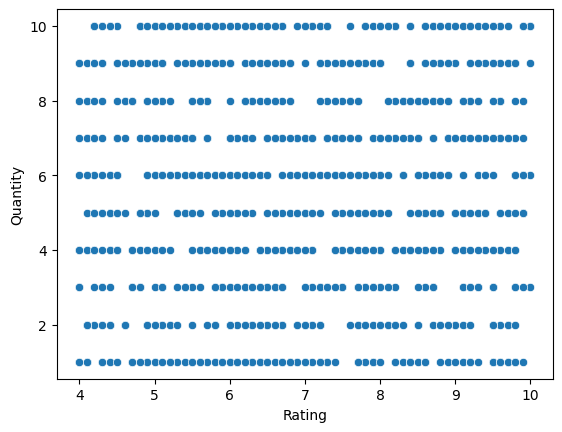

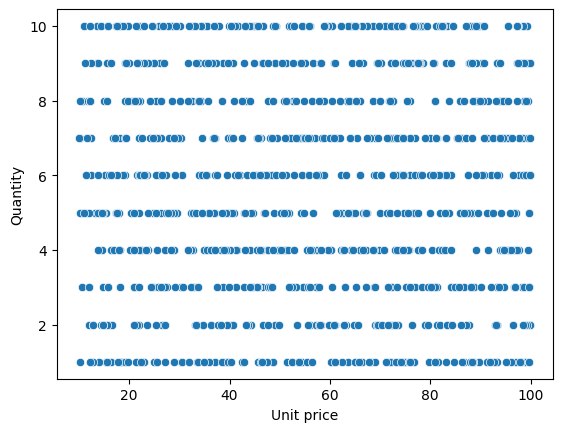

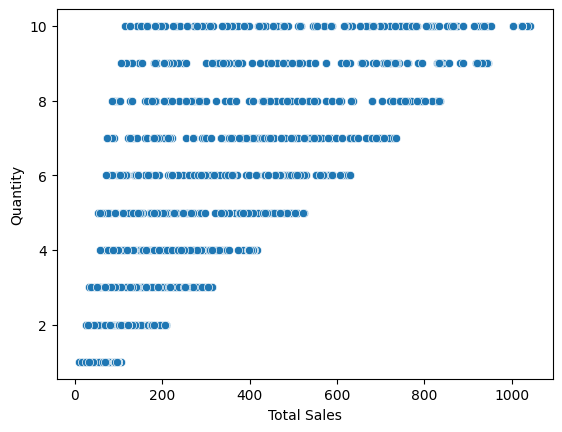

In [37]:
for i in ['Rating', 'Unit price', 'Total Sales']:
       sns.scatterplot(data=df, x=i, y= 'Quantity')
       plt.show()


In [30]:
# correlation with heatmap to interpret the relation and multicolliniarity
s=df.select_dtypes(include="number").corr()

<Axes: >

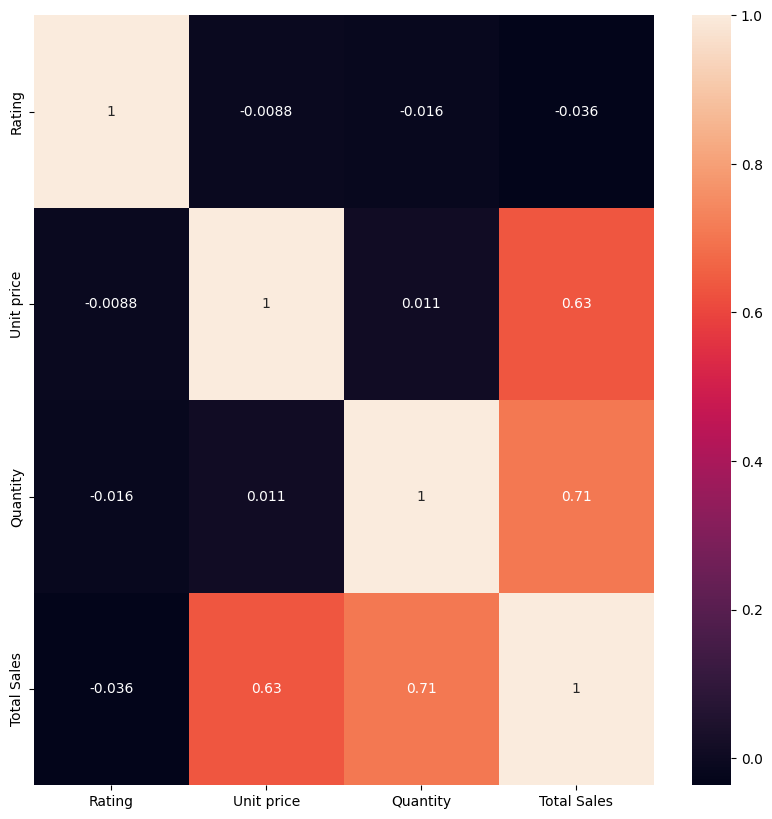

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(s, annot=True)

In [ ]:
# Encoding of Data

In [38]:
pd.get_dummies(data=df, columns=["Branch","City","Customer type","Gender","Product line","MonthName","Payment"],drop_first=True)

,Invoice ID,Date,Rating,Unit price,Quantity,Total Sales,Branch_B,Branch_C,City_Naypyitaw,City_Yangon,...,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,MonthName_January,MonthName_March,Payment_Credit card,Payment_Ewallet
0,750-67-8428,05-01-2019,9.1,74.69,7,548.9715,False,False,False,True,...,False,False,False,True,False,False,True,False,False,True
1,226-31-3081,08-03-2019,9.6,15.28,5,80.2200,False,True,True,False,...,False,False,False,False,False,False,False,True,False,False
2,631-41-3108,03-03-2019,7.4,46.33,7,340.5255,False,False,False,True,...,True,False,False,False,True,False,False,True,True,False
3,123-19-1176,27-01-2019,8.4,58.22,8,489.0480,False,False,False,True,...,True,False,False,True,False,False,True,False,False,True
4,373-73-7910,08-02-2019,5.3,86.31,7,634.3785,False,False,False,True,...,True,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,29-01-2019,6.2,40.35,1,42.3675,False,True,True,False,...,True,False,False,True,False,False,True,False,False,True
996,303-96-2227,02-03-2019,4.4,97.38,10,1022.4900,True,False,False,False,...,False,False,False,False,True,False,False,True,False,True
997,727-02-1313,09-02-2019,7.7,31.84,1,33.4320,False,False,False,True,...,True,False,True,False,False,False,False,False,False,False
998,347-56-2442,22-02-2019,4.1,65.82,1,69.1110,False,False,False,True,...,True,False,False,False,True,False,False,False,False,False
